In [2]:
import sys
import pandas as pd
import numpy as np
import glob

In [3]:
files = sorted(glob.glob('../../data/*.nc'))
len(files)


62

In [4]:
import xarray as xr

In [5]:
ds = xr.open_mfdataset(files)
ds

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 89, time: 744)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 2.0 1.75 1.5 1.25 ... -19.5 -19.75 -20.0
  * time       (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2021-12-01
Data variables:
    z          (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(12, 89, 81), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-10-25 16:04:52 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
lon  = -76.201172
lat  = -13.752725
elev =  11.9

In [7]:
df = ds.sel(longitude=lon, 
            latitude=lat, 
            method='nearest')

/home/christian/miniconda3/envs/geocat/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/christian/miniconda3/envs/geocat/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [8]:
df = df.to_dataframe()
df

,longitude,latitude,z,u10,v10,t2m,tp
time,,,,,,,
1960-01-01,-76.25,-13.75,495.257812,1.712164,2.557608,295.048828,0.000126
1960-02-01,-76.25,-13.75,495.257812,1.719407,1.938375,294.937683,0.000080
1960-03-01,-76.25,-13.75,495.257812,1.489329,2.567127,294.616028,0.000005
1960-04-01,-76.25,-13.75,495.257812,1.437099,2.936696,293.189545,0.000009
1960-05-01,-76.25,-13.75,495.257812,1.301378,2.930183,290.973602,0.000035
...,...,...,...,...,...,...,...
2021-08-01,-76.25,-13.75,495.257812,1.193846,4.423724,289.653442,0.000013
2021-09-01,-76.25,-13.75,495.257812,1.386104,4.327612,289.643341,0.000024
2021-10-01,-76.25,-13.75,495.257812,1.495697,4.458959,290.019928,0.000029


In [9]:
g       = 9.80665
hgt_era = df['z'].values[0]/g
hgt_aws = elev
df['t2m_corr'] = df['t2m'].values + (hgt_aws - hgt_era) * -0.009
df[['t2m', 't2m_corr']] = df[['t2m', 't2m_corr']] - 273.16
df

,longitude,latitude,z,u10,v10,t2m,tp,t2m_corr
time,,,,,,,,
1960-01-01,-76.25,-13.75,495.257812,1.712164,2.557608,21.888824,0.000126,22.236237
1960-02-01,-76.25,-13.75,495.257812,1.719407,1.938375,21.777679,0.000080,22.125092
1960-03-01,-76.25,-13.75,495.257812,1.489329,2.567127,21.456024,0.000005,21.803436
1960-04-01,-76.25,-13.75,495.257812,1.437099,2.936696,20.029541,0.000009,20.376953
1960-05-01,-76.25,-13.75,495.257812,1.301378,2.930183,17.813599,0.000035,18.161011
...,...,...,...,...,...,...,...,...
2021-08-01,-76.25,-13.75,495.257812,1.193846,4.423724,16.493439,0.000013,16.840851
2021-09-01,-76.25,-13.75,495.257812,1.386104,4.327612,16.483337,0.000024,16.830750
2021-10-01,-76.25,-13.75,495.257812,1.495697,4.458959,16.859924,0.000029,17.207336


In [10]:
# Función mejorada para sumar columnas donde contienen nan's
def nansumwrapper(a, **kwargs):
    if np.isnan(a).all():
        return np.nan
    else:
        return np.nansum(a, **kwargs)

In [11]:
df_aws = pd.read_csv('../../data/3117033.csv', delimiter=',', index_col=['DATE'], 
                 parse_dates=['DATE']).resample('1M').agg({'PRCP':nansumwrapper, 'TAVG':np.mean, 'TMIN':np.mean, 'TMAX':np.mean})
df_aws

,PRCP,TAVG,TMIN,TMAX
DATE,,,,
1963-03-31,NaN,22.150000,17.151852,27.108000
1963-04-30,NaN,20.832000,16.333333,25.991304
1963-05-31,NaN,19.395833,15.052174,24.495238
1963-06-30,NaN,16.800000,12.508000,21.764286
1963-07-31,NaN,16.461290,12.086667,21.042308
...,...,...,...,...
2022-06-30,0.0,16.206667,12.958333,20.022222
2022-07-31,0.0,15.861290,12.766667,19.060000
2022-08-31,0.0,15.500000,12.843478,18.692308


In [12]:
df_aws1 = pd.read_csv('../../data/3117033.csv', delimiter=',', index_col=['DATE'], 
                 parse_dates=['DATE']).resample('1MS').agg({'PRCP':nansumwrapper, 'TAVG':np.mean, 'TMIN':np.mean, 'TMAX':np.mean})
df_aws1

,PRCP,TAVG,TMIN,TMAX
DATE,,,,
1963-03-01,NaN,22.150000,17.151852,27.108000
1963-04-01,NaN,20.832000,16.333333,25.991304
1963-05-01,NaN,19.395833,15.052174,24.495238
1963-06-01,NaN,16.800000,12.508000,21.764286
1963-07-01,NaN,16.461290,12.086667,21.042308
...,...,...,...,...
2022-06-01,0.0,16.206667,12.958333,20.022222
2022-07-01,0.0,15.861290,12.766667,19.060000
2022-08-01,0.0,15.500000,12.843478,18.692308


In [13]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='DATE'>

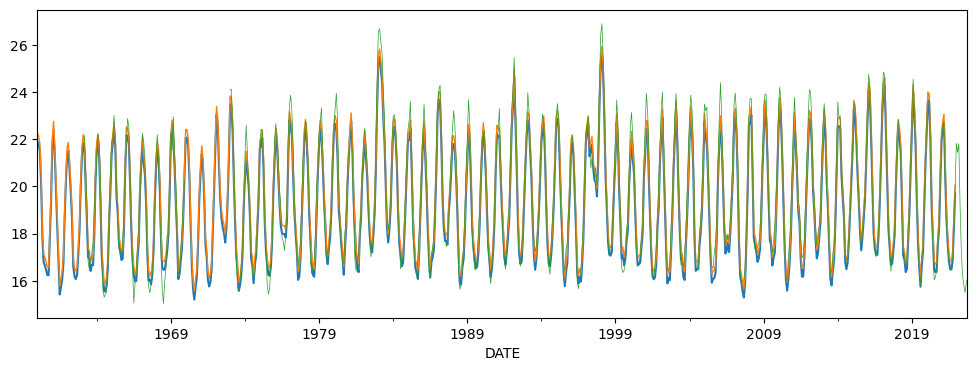

In [14]:
fig, (ax) = plt.subplots(1, 1, figsize=(12, 4))
df['t2m'].plot(ax=ax, linewidth=1.5)
df['t2m_corr'].plot(ax=ax, linewidth=1.0)
df_aws1['TAVG'].plot(ax=ax,linewidth=0.5)


In [15]:
df_all = pd.merge(df, df_aws1, how='left', left_index=True, right_index=True)
df_all

,longitude,latitude,z,u10,v10,t2m,tp,t2m_corr,PRCP,TAVG,TMIN,TMAX
time,,,,,,,,,,,,
1960-01-01,-76.25,-13.75,495.257812,1.712164,2.557608,21.888824,0.000126,22.236237,NaN,NaN,NaN,NaN
1960-02-01,-76.25,-13.75,495.257812,1.719407,1.938375,21.777679,0.000080,22.125092,NaN,NaN,NaN,NaN
1960-03-01,-76.25,-13.75,495.257812,1.489329,2.567127,21.456024,0.000005,21.803436,NaN,NaN,NaN,NaN
1960-04-01,-76.25,-13.75,495.257812,1.437099,2.936696,20.029541,0.000009,20.376953,NaN,NaN,NaN,NaN
1960-05-01,-76.25,-13.75,495.257812,1.301378,2.930183,17.813599,0.000035,18.161011,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,-76.25,-13.75,495.257812,1.193846,4.423724,16.493439,0.000013,16.840851,0.0,16.464516,13.490476,19.446667
2021-09-01,-76.25,-13.75,495.257812,1.386104,4.327612,16.483337,0.000024,16.830750,NaN,16.570000,13.826087,20.770000
2021-10-01,-76.25,-13.75,495.257812,1.495697,4.458959,16.859924,0.000029,17.207336,NaN,17.045161,14.117391,21.200000


In [16]:
temp2 = df_all[['t2m_corr', 'TAVG']].dropna()
temp2.columns = ['MOD', 'OBS']
temp2

,MOD,OBS
time,,
1963-03-01,21.907104,22.150000
1963-04-01,20.380859,20.832000
1963-05-01,18.888062,19.395833
1963-06-01,17.350647,16.800000
1963-07-01,17.284729,16.461290
...,...,...
2021-08-01,16.840851,16.464516
2021-09-01,16.830750,16.570000
2021-10-01,17.207336,17.045161


In [17]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde

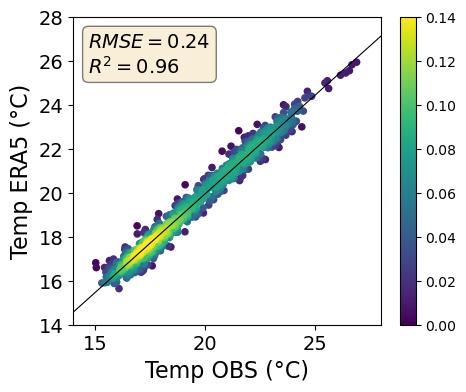

In [19]:
y1 = temp2['OBS'].values
y2 = temp2['MOD'].values
idxs = np.arange(len(y1))
np.random.shuffle(idxs)
n_toplot=10**10

y_expected = y1.reshape(-1)[idxs[:n_toplot]]
y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

xy = np.vstack([y_expected, y_predicted])
z = gaussian_kde(xy)(xy)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]

fig = plt.figure(figsize=(5,4))
plt.ylabel('Temp ERA5 (°C)', fontsize=16)
plt.xlabel('Temp OBS (°C)', fontsize=16)
sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
plt.clim(0,0.14)
plt.tick_params(labelsize=14)
plt.colorbar(sc)

plt.xlim(14, 28)
plt.ylim(14, 28)
plt.gca().set_box_aspect(1)

reg = LinearRegression().fit(y1.reshape(-1, 1),y2)
x_int = np.arange(13,29,0.1)
plt.plot(x_int, reg.intercept_ + reg.coef_ * x_int, linewidth=0.8, color='k', linestyle ='-')
textstr = '\n'.join((
r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

fig.savefig('fig/Temp_corr_1963_2020.png', dpi = 200, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)